The main idea of this work is to train a Convolutional Neural Network on a novel dataset called Chinese MNIST.

# Importing Libraries

In [1]:
import os
import keras
import numpy as np 
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten

# Dataset
## Importing Dataset

In [2]:
data = pd.read_csv(r'D:\Academic\Ph.D\Programming\DataBase\PhD Thesis\Classification\Multiclass\chineseMNIST.csv\chineseMNIST.csv')

## An overview

In [3]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九


## Check Data description
Reviewing the pure statistical description of the problem

In [4]:
data.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label
count,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004000,0.001533,0.000933,0.002133,0.001067,0.000200,0.001200,0.001400,0.001333,6.667410e+06
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164881,0.079570,0.085633,0.119428,0.073024,0.018257,0.079156,0.089807,0.095911,2.494502e+07
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+02
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.000000,5.000000,10.000000,10.000000,7.000000,2.000000,8.000000,9.000000,8.000000,1.000000e+08


## Check the data types
Printing the 

<ol>
<li>size</li>
<li>Dtype</li>
<li>number</li>
<li>attributes</li>
<li>memory usage</li>
<li>samples</li>
</ol>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 4098 entries, pixel_0 to character
dtypes: int64(4097), object(1)
memory usage: 469.0+ MB


## Marking the pixels

In [6]:
data.columns

Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_4088', 'pixel_4089', 'pixel_4090', 'pixel_4091', 'pixel_4092',
       'pixel_4093', 'pixel_4094', 'pixel_4095', 'label', 'character'],
      dtype='object', length=4098)

## Check missing values

In [7]:
data.isnull().sum()

pixel_0       0
pixel_1       0
pixel_2       0
pixel_3       0
pixel_4       0
             ..
pixel_4093    0
pixel_4094    0
pixel_4095    0
label         0
character     0
Length: 4098, dtype: int64

## Dataset size

In [8]:
data.shape

(15000, 4098)

## Defining the input and class label
dividing the data into the input and output features for training purposes.

In [9]:
lab = {lab: i for i, lab in enumerate(data.label.unique())}
data.label = data.label.map(lab)

In [10]:
X = (data.iloc[:, :-2]).values
y = (data.iloc[:, -2]).values
char = (data.iloc[:, -1]).values

In [11]:
class_labels = np.unique(y)
n_class = len(np.unique(y))
print('class_labels:', '\n', class_labels)

class_labels: 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


Text(0.5, 1.0, 'class labels')

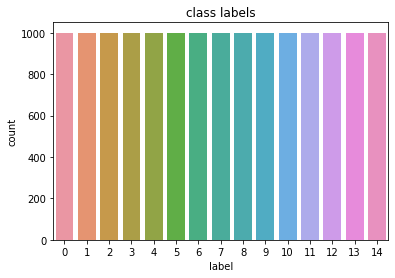

In [12]:
sns.countplot(x="label", data=data)
plt.title("class labels")

Review the char and labels together

In [13]:
data[['label', 'character']]

,label,character
0,0,九
1,0,九
2,0,九
3,0,九
4,0,九
...,...,...
14995,14,八
14996,14,八
14997,14,八
14998,14,八


# Preprocessing data
Splitting the dataset for the training and validating steps

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(11250, 4096) (3750, 4096) (11250,) (3750,)


Normalizing and converting the labels to prepare the data for ML Alg.
<br>
Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)</br>

In [15]:
def prepare_data(X, size=64):
    X = X.reshape(X.shape[0], size, size, 1)
    X = X.astype("float32")
    return X/255.

In [16]:
x_train = prepare_data(x_train)
x_test = prepare_data(x_test)
print(x_train.shape, x_test.shape)

(11250, 64, 64, 1) (3750, 64, 64, 1)


In [17]:
y_train = tf.keras.utils.to_categorical(y_train, 15)
y_test = tf.keras.utils.to_categorical(y_test, 15)
print(y_train.shape, y_test.shape)

(11250, 15) (3750, 15)


# Visualizing

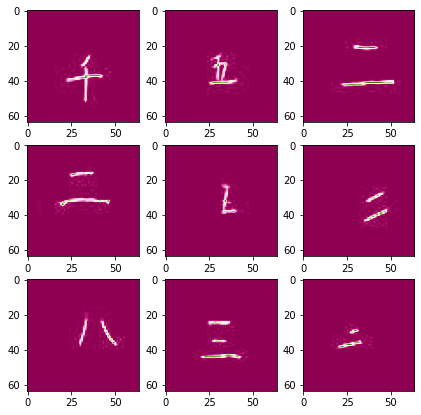

In [18]:
plt.figure(figsize=(7, 7))
for i in range(9):
    plt.subplot(3, 3,i+1)
    plt.imshow(x_train[i], cmap= 'PiYG')
plt.show()

# Modeling

## Build the layers
For this model, I have two convolutional layers, with 2D max Pooling, following by two more 2d-64 convolutional layers and the same pooling layer and 128 convolutional layers which supported by two dense layers.

The solver or optimizer is stochastic gradient descent. Different solvers have different convergence rates and training speeds. You may also need to change it based on your problem.

In [19]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(
    64, 64, 1), kernel_initializer='he_uniform', padding='same'))
convout1 = Activation('relu')
model.add(convout1)
model.add(Conv2D(32, (3, 3), activation='relu',
          kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu',
          kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',
          kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu',
          kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',
          kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
D1 = (Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(D1)
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(15, activation='softmax'))

## Compile
Here we defined the optimizer, which we imported directly and the model compile.

In [20]:
import warnings
warnings.simplefilter('ignore')
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics=['accuracy'])

## Model summary

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        3

# Compiling the model
Regarding this dataset, I used 64 as for batching to achieve better accuracy.

Due to the computational resource and time, I reduced the epochs of training to 2. One may achieve an accuracy of almost 94% by increasing the epochs to 200.

In [22]:
model.fit(x_train, y_train,
          batch_size=64,
          epochs=2,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test,
                       y_test,
                       verbose=0)

Epoch 1/2
176/176 [==============================] - 111s 429ms/step - loss: 2.5134 - accuracy: 0.1638 - val_loss: 1.7414 - val_accuracy: 0.4707
Epoch 2/2
176/176 [==============================] - 74s 422ms/step - loss: 1.6296 - accuracy: 0.4721 - val_loss: 1.0762 - val_accuracy: 0.6504


In [23]:
score[1]

0.6503999829292297